<a href="https://colab.research.google.com/github/ayoub-ait-idir/Internship-at-OCP/blob/main/stage_ocp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importer les packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

#Lire la base de données
extraire les données de toute les feuilles 2017, 2018, 2019 et LIMS2020, puis créer un DataFrame**

In [ ]:
xls = pd.ExcelFile('/content/analyses.xlsx')
# Les données de l'année 2017
df_2017 = pd.read_excel(xls, '2017', skiprows=2)
# Les données de l'année 2018
df_2018 = pd.read_excel(xls, '2018', skiprows=2)
# Les données de l'année 2019
df_2019 = pd.read_excel(xls, '2019', skiprows=2)

# Les données de l'année 2020
nan_values = ["--",'No events found.'," ",'No Data','The time is invalid.','Calculation aborted', 'Arc Off-line']
df_2020 = pd.read_excel(xls, 'LIMS2020', skiprows=2, na_values=nan_values)
df_2020 = df_2020.iloc[:,[i for i in range(20)]]
df_2020['N°Train'] = df_2020['N°Train'].astype(str)

In [ ]:
df = pd.concat([df_2017, df_2018, df_2019, df_2020], ignore_index=True)
assert df_2017.shape[0] + df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0] == df.shape[0]

In [ ]:
#df.reset_index(inplace=True, drop=True)
df.head()

,Date,N°Train,Sr_ppm,SO3,SiO2_Tot,P2O5,Na2O,MO,MgO,K2O,H2O,Fe2O3,CO2,Cd_ppm,CaO,Ba_ppm,Al2O3,SiO2_rea,F,S_F
0,2017-01-01,TR7603,1206.0,1.58,4.26,30.21,0.90,2.73,0.78,0.07,5.45,0.154,6.23,15.8,49.15,119.0,0.37,NaN,NaN,NaN
1,2017-01-01,TR7611,1185.0,1.58,5.51,29.91,0.88,2.47,0.84,0.08,5.15,0.194,6.43,16.1,48.77,118.0,0.40,NaN,NaN,NaN
2,2017-01-02,TR7611,1189.0,1.53,5.10,30.22,0.87,2.01,0.79,0.07,5.17,0.153,6.52,17.1,48.86,122.0,0.37,NaN,NaN,NaN
3,2017-01-02,TR7617,1173.0,1.56,5.25,29.75,0.85,1.88,0.88,0.07,4.74,0.174,6.81,16.1,48.49,122.0,0.38,NaN,NaN,NaN
4,2017-01-03,TR7605,1226.0,1.55,4.90,30.14,0.84,1.89,0.83,0.08,5.01,0.173,6.72,16.1,48.90,126.0,0.40,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Date', 'N°Train', 'Sr_ppm', 'SO3', 'SiO2_Tot', 'P2O5', 'Na2O', 'MO',
       'MgO', 'K2O', 'H2O', 'Fe2O3', 'CO2', 'Cd_ppm', 'CaO', 'Ba_ppm', 'Al2O3',
       'SiO2_rea', 'F', 'S_F'],
      dtype='object')

In [ ]:
print(df.shape)
type(df)

(4569, 20)


pandas.core.frame.DataFrame

In [ ]:
# Supprimer la colonne N°Train
df.drop(['N°Train'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3335 non-null   datetime64[ns]
 1   Sr_ppm    3325 non-null   float64       
 2   SO3       3329 non-null   float64       
 3   SiO2_Tot  3326 non-null   float64       
 4   P2O5      3334 non-null   float64       
 5   Na2O      3327 non-null   float64       
 6   MO        3317 non-null   float64       
 7   MgO       3331 non-null   float64       
 8   K2O       3322 non-null   float64       
 9   H2O       3325 non-null   float64       
 10  Fe2O3     3323 non-null   float64       
 11  CO2       3325 non-null   float64       
 12  Cd_ppm    3332 non-null   float64       
 13  CaO       3330 non-null   float64       
 14  Ba_ppm    3324 non-null   float64       
 15  Al2O3     3321 non-null   float64       
 16  SiO2_rea  2580 non-null   float64       
 17  F         2433

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Données non nécessaires (*Repetitive Data, Duplicates..*)

In [ ]:
# extraire les lignes dupliquées dans duplicate
duplicate = df[df.duplicated(keep='first')]
print('le nombre des lignes dupliquées = ', len(duplicate))
print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate)/len(df)*100)))

le nombre des lignes dupliquées =  1347
le pourcentage des lignes dupliquées = 29 %


In [ ]:
duplicate.head()

,Date,Sr_ppm,SO3,SiO2_Tot,P2O5,Na2O,MO,MgO,K2O,H2O,Fe2O3,CO2,Cd_ppm,CaO,Ba_ppm,Al2O3,SiO2_rea,F,S_F
2640,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2642,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Garder juste les lignes non dupliquées 
df = df[~df.duplicated()]
print('la taille du nouveau df = ', df.shape )
# Verifier si le nombre des lignes dupliqueés = 0
assert(df.duplicated().sum() == 0)
df.head()

la taille du nouveau df =  (3222, 19)


,Date,Sr_ppm,SO3,SiO2_Tot,P2O5,Na2O,MO,MgO,K2O,H2O,Fe2O3,CO2,Cd_ppm,CaO,Ba_ppm,Al2O3,SiO2_rea,F,S_F
0,2017-01-01,1206.0,1.58,4.26,30.21,0.90,2.73,0.78,0.07,5.45,0.154,6.23,15.8,49.15,119.0,0.37,NaN,NaN,NaN
1,2017-01-01,1185.0,1.58,5.51,29.91,0.88,2.47,0.84,0.08,5.15,0.194,6.43,16.1,48.77,118.0,0.40,NaN,NaN,NaN
2,2017-01-02,1189.0,1.53,5.10,30.22,0.87,2.01,0.79,0.07,5.17,0.153,6.52,17.1,48.86,122.0,0.37,NaN,NaN,NaN
3,2017-01-02,1173.0,1.56,5.25,29.75,0.85,1.88,0.88,0.07,4.74,0.174,6.81,16.1,48.49,122.0,0.38,NaN,NaN,NaN
4,2017-01-03,1226.0,1.55,4.90,30.14,0.84,1.89,0.83,0.08,5.01,0.173,6.72,16.1,48.90,126.0,0.40,NaN,NaN,NaN


In [ ]:
duplicate_2017 =  df_2017[df_2017.duplicated(keep='first')]
duplicate_2018 =  df_2018[df_2018.duplicated(keep='first')]
duplicate_2019 =  df_2019[df_2019.duplicated(keep='first')]
duplicate_2020 =  df_2020[df_2020.duplicated(keep='first')]

print('les lignes dupliquées 2017 = ', len(duplicate_2017))
print('les lignes dupliquées 2018 = ', len(duplicate_2018))
print('les lignes dupliquées 2019 = ', len(duplicate_2019))
print('les lignes dupliquées 2020 = ', len(duplicate_2020))

les lignes dupliquées 2017 =  0
les lignes dupliquées 2018 =  0
les lignes dupliquées 2019 =  0
les lignes dupliquées 2020 =  1347


# Les Valeurs Manquantes (*Missing Data*)

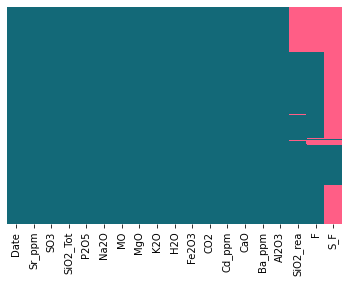

In [ ]:
# Tracer la Heatmap des valeurs manquantes 
colours = ['#136978', '#ff5e86']
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [ ]:
# Le nombre de valeurs manquantes dans chaque colonne
print('\nle nombre de valeurs manquantes dans chaque colonne: ')
print(df.isna().sum().sort_values(ascending=False))
# Calculer les pourcentages des valeurs manquantes 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 20:
    print('{} - {}%'.format(col, rounded_pct))


le nombre de valeurs manquantes dans chaque colonne: 
S_F         2640
F            794
SiO2_rea     722
MO            16
Al2O3         15
K2O           14
Fe2O3         13
Ba_ppm        12
Sr_ppm        11
Na2O           9
H2O            8
CO2            8
SiO2_Tot       7
SO3            7
CaO            6
MgO            5
Cd_ppm         4
P2O5           2
Date           1
dtype: int64

les pourcentages importants des valeurs manquantes: 
SiO2_rea - 22.41%
F - 24.64%
S_F - 81.94%


In [ ]:
# Supprimer les colonnes ou le pourcentage des VM est > 50% 
l = len(df)
for col in df.columns:
  p = df[col].isna().sum()/ l
  if p > 0.5:
    df.drop(col, axis=1, inplace=True)
print(df.columns)

Index(['Date', 'Sr_ppm', 'SO3', 'SiO2_Tot', 'P2O5', 'Na2O', 'MO', 'MgO', 'K2O',
       'H2O', 'Fe2O3', 'CO2', 'Cd_ppm', 'CaO', 'Ba_ppm', 'Al2O3', 'SiO2_rea',
       'F'],
      dtype='object')


In [ ]:
# Remplacer les valeurs manquantes: 
# Colonne Date : forward fill (remplacer 1 VM par la val qui la précéde)
df['Date'].fillna(method='ffill', inplace=True)
# Le reste des colonnes : remplacer avec nan
for col in df.columns:
  if col != 'Date' and col != 'N°Train':
    df[col].fillna(np.nan, inplace=True)
#print(df.isna().sum())

# Les valeurs Aberrantes (*Irregular Data 'Outliers'*)

In [ ]:
df.reset_index(inplace=True, drop=True)

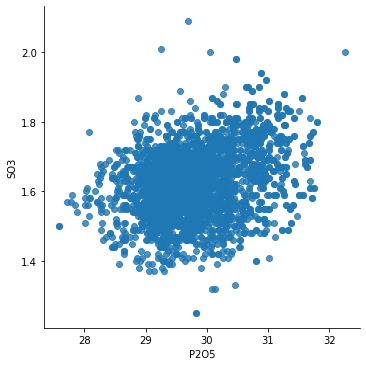

In [ ]:
sns.lmplot(x='P2O5', y='SO3', data=df, fit_reg=False)

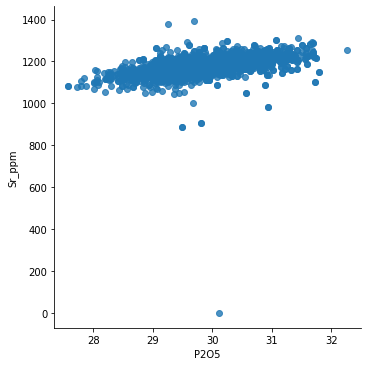

In [ ]:
sns.lmplot(x='P2O5', y='Sr_ppm', data=df, fit_reg=False)

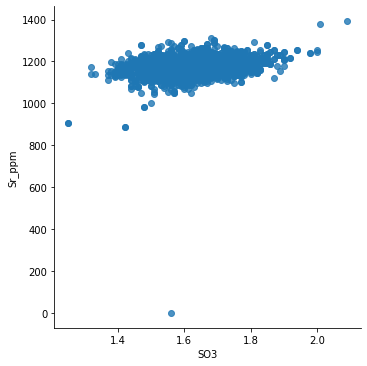

In [ ]:
sns.lmplot(x='SO3', y='Sr_ppm', data=df, fit_reg=False)

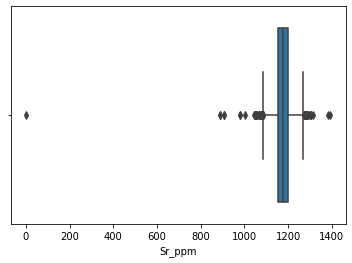

In [ ]:
sns.boxplot(data=df, x=df['Sr_ppm'])

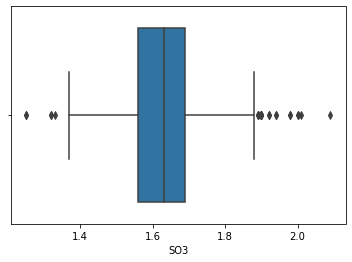

In [ ]:
sns.boxplot(data=df, x=df['SO3'])

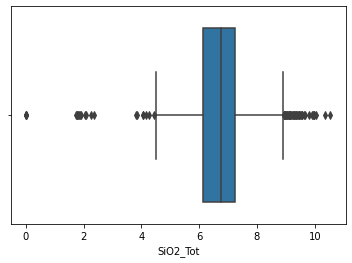

In [ ]:
sns.boxplot(data=df, x=df['SiO2_Tot'])

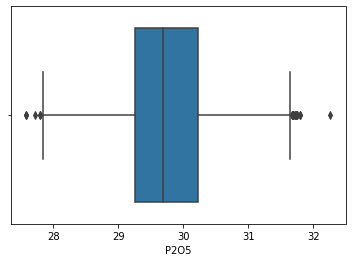

In [ ]:
sns.boxplot(data=df, x=df['P2O5'])

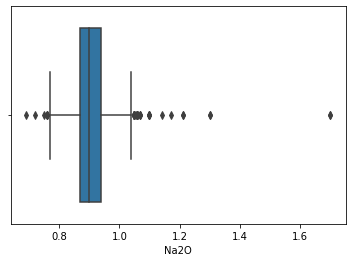

In [ ]:
sns.boxplot(data=df, x=df['Na2O'])

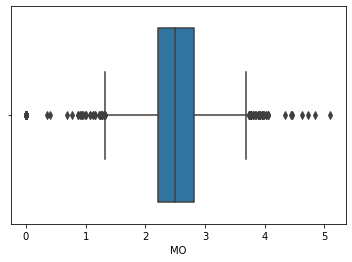

In [ ]:
sns.boxplot(data=df, x=df['MO'])

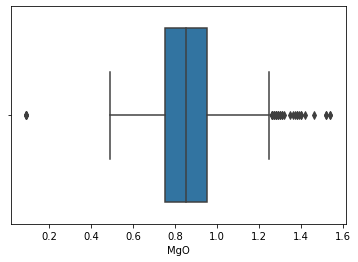

In [ ]:
sns.boxplot(data=df, x=df['MgO'])

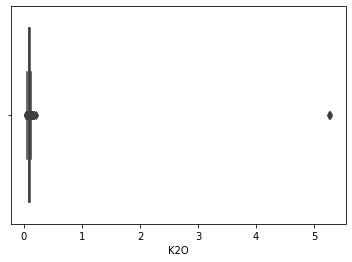

In [ ]:
sns.boxplot(data=df, x=df['K2O'])

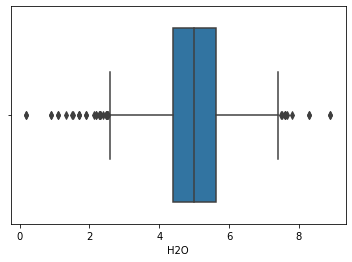

In [ ]:
sns.boxplot(data=df, x=df['H2O'])

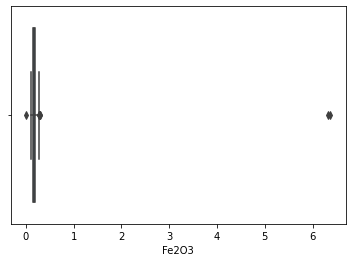

In [ ]:
sns.boxplot(data=df, x=df['Fe2O3'])

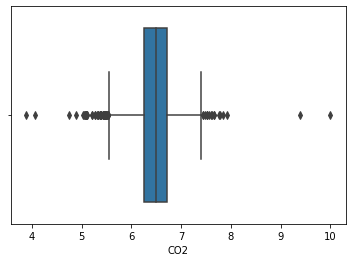

In [ ]:
sns.boxplot(data=df, x=df['CO2'])


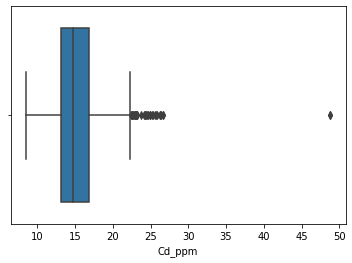

In [ ]:
sns.boxplot(data=df, x=df['Cd_ppm'])

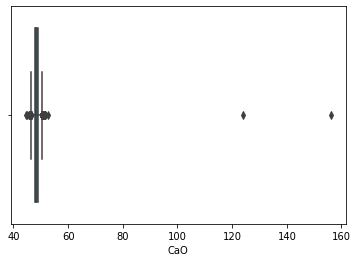

In [ ]:
sns.boxplot(data=df, x=df['CaO'])

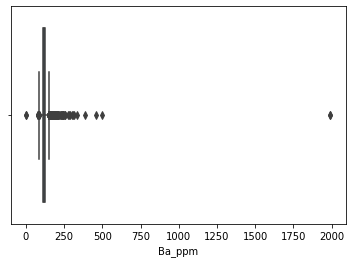

In [ ]:
sns.boxplot(data=df, x=df['Ba_ppm'])

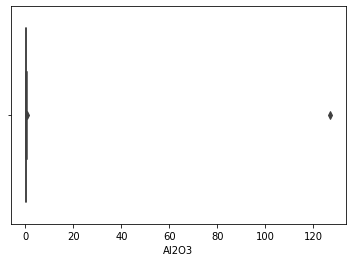

In [ ]:
sns.boxplot(data=df, x=df['Al2O3'])

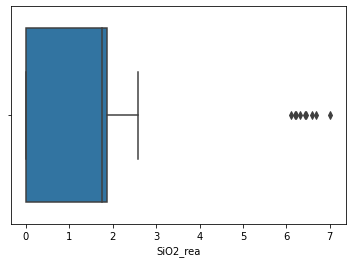

In [ ]:
sns.boxplot(data=df, x=df['SiO2_rea'])

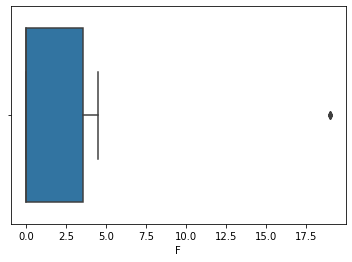

In [ ]:
sns.boxplot(data=df, x=df['F'])

In [ ]:
# 3 ème méthode 
# IQR: Interquartile Range

rows_to_drop = []
for col in df.columns[1:]:
  print(type(df[col]))
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_whisker = q1 - 1.5*iqr
  upper_whisker = q3 + 1.5*iqr
  l = len(df)
  for i in range(0, l):
    if (df.loc[df.index[i], col]>upper_whisker) | (df.loc[df.index[i], col]<lower_whisker):
      # Remplacer les outliers avec nan
      df.loc[df.index[i], col] = np.nan
      #rows_to_drop.append(i)
'''
#df.drop(rows_to_drop, axis=0, inplace=True)
print(len(rows_to_drop))
df
'''
#if we want to drop the rows with outliers we are going to drop 793 columns

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


'\n#df.drop(rows_to_drop, axis=0, inplace=True)\nprint(len(rows_to_drop))\ndf\n'

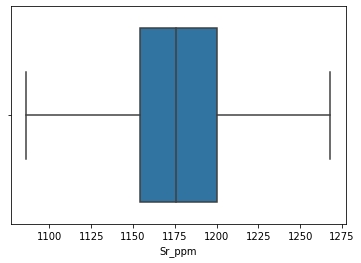

In [ ]:
sns.boxplot(data=df, x=df['Sr_ppm'])

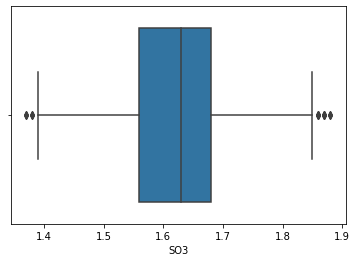

In [ ]:
sns.boxplot(data=df, x=df['SO3'])

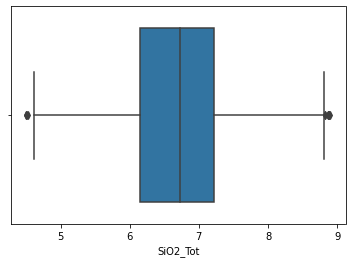

In [ ]:
sns.boxplot(data=df, x=df['SiO2_Tot'])

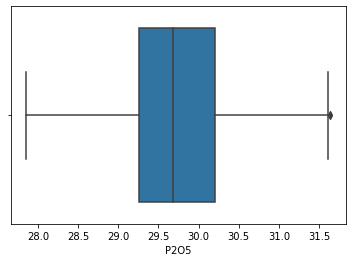

In [ ]:
sns.boxplot(data=df, x=df['P2O5'])

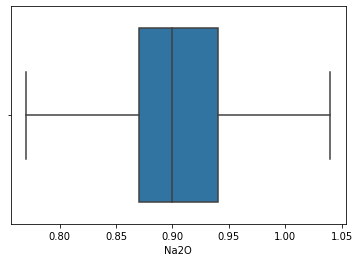

In [ ]:
sns.boxplot(data=df, x=df['Na2O'])

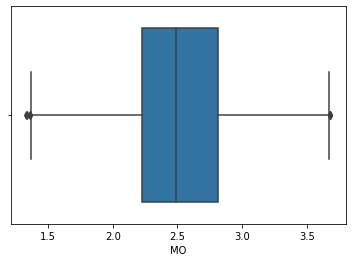

In [ ]:
sns.boxplot(data=df, x=df['MO'])

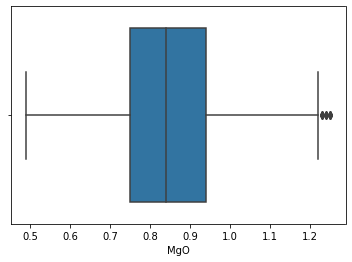

In [ ]:
sns.boxplot(data=df, x=df['MgO'])

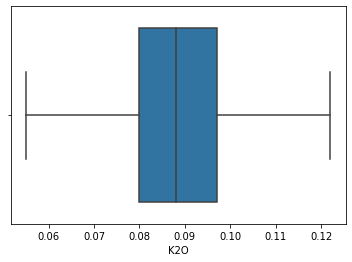

In [ ]:
sns.boxplot(data=df, x=df['K2O'])

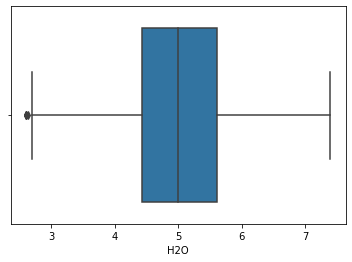

In [ ]:
sns.boxplot(data=df, x=df['H2O'])

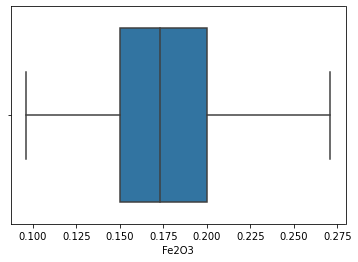

In [ ]:
sns.boxplot(data=df, x=df['Fe2O3'])

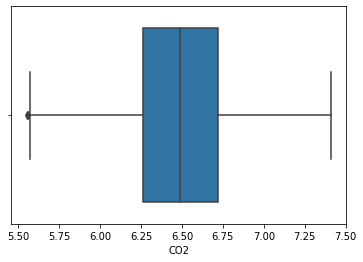

In [ ]:
sns.boxplot(data=df, x=df['CO2'])

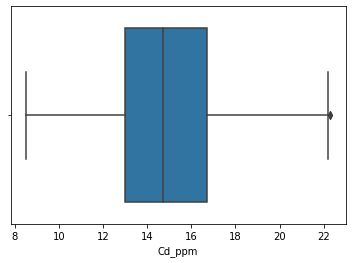

In [ ]:
sns.boxplot(data=df, x=df['Cd_ppm'])

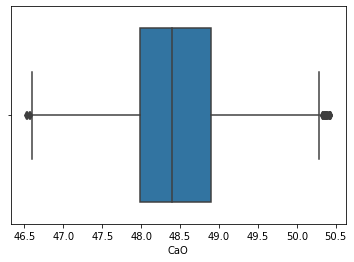

In [ ]:
sns.boxplot(data=df, x=df['CaO'])

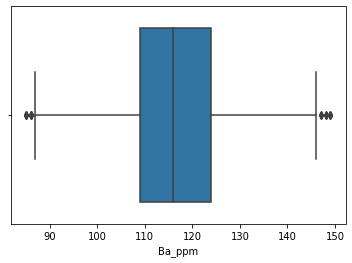

In [ ]:
sns.boxplot(data=df, x=df['Ba_ppm'])

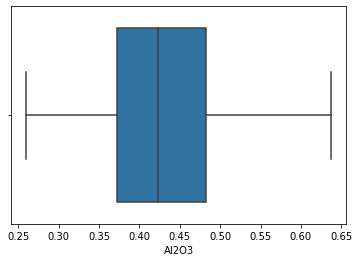

In [ ]:
sns.boxplot(data=df, x=df['Al2O3'])

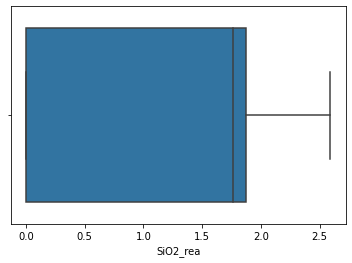

In [ ]:
sns.boxplot(data=df, x=df['SiO2_rea'])

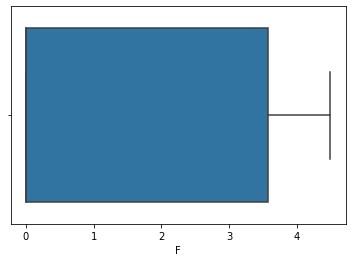

In [ ]:
sns.boxplot(data=df, x=df['F'])

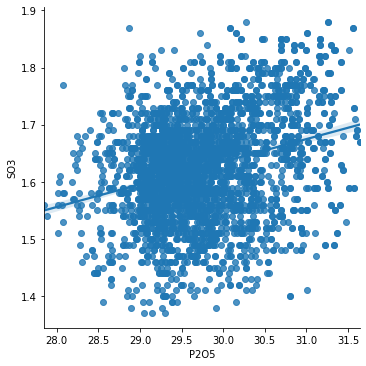

In [ ]:
sns.lmplot(x='P2O5', y='SO3', data=df, fit_reg=True)

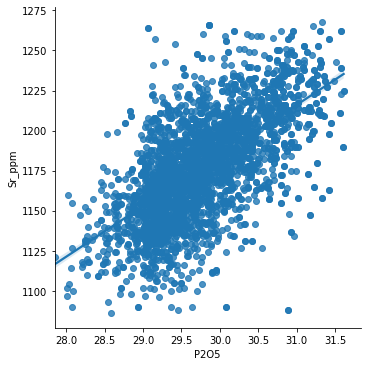

In [ ]:
sns.lmplot(x='P2O5', y='Sr_ppm', data=df, fit_reg=True)

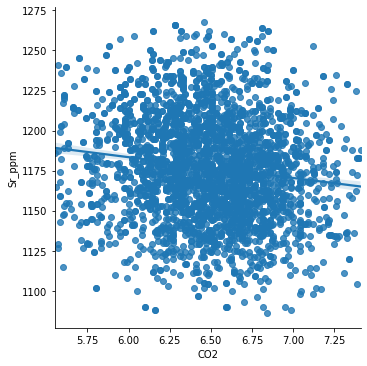

In [ ]:
sns.lmplot(x='CO2', y='Sr_ppm', data=df, fit_reg=True)

# aautres méthodes (Other methods to hundle Outliers)

In [ ]:
# 1ère méthode
'''
# To handle the problem of outliers, we use the flooring technique
outliers = {}
for col in df.iloc[:, 2:].columns:
  skew = df[col].skew()
  if skew > 2 or skew < -1 :
    outliers[col] = skew
    # Calculate the 10th and the 90th percentile of the column col
    q10 = df[col].quantile(0.10) 
    q90 = df[col].quantile(0.90)
    # Execute the outliers removal
    df[col] = np.where(df[col]<q10, q10, df[col])
    df[col] = np.where(df[col]>q90, q90, df[col])

print(outliers)
'''
# 2èm méthode
# Trouver les val aberrantes avec Z score:
"""
outliers = []

def detect_abb(data):
  thresh = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > thresh:
      outliers.append(i)
  return outliers
"""

'\noutliers = []\n\ndef detect_abb(data):\n  thresh = 3\n  mean = np.mean(data)\n  std = np.std(data)\n\n  for i in data:\n    z_score = (i - mean)/std\n    if np.abs(z_score) > thresh:\n      outliers.append(i)\n  return outliers\n'

In [ ]:
# Méthode IQR appliquée a une seule colonne P2O5
'''
q1 = df['P2O5'].quantile(0.25)
q3 = df['P2O5'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

df = df[(df['P2O5'] < upper_whisker) & (df['P2O5'] > lower_whisker)]
sns.boxplot(data=df, x=df['SO3'])
'''
#-----------------------------------------------------------------------------------
'''
col= 'P2O5'
for i in range(0, len(df)):
  if (df.loc[df.index[i], 'P2O5']>30) | (df.loc[df.index[i], 'P2O5']<29):
    df.loc[df.index[i], 'P2O5'] = np.nan
df.head()
'''

"\ncol= 'P2O5'\nfor i in range(0, len(df)):\n  if (df.loc[df.index[i], 'P2O5']>30) | (df.loc[df.index[i], 'P2O5']<29):\n    df.loc[df.index[i], 'P2O5'] = np.nan\ndf.head()\n"

# Données numériques Vs Non numériques

In [ ]:
# Numeric columns
df_num = df.select_dtypes(include=np.number)
numeric_cols = df_num.columns.values
print(numeric_cols)
# Non numeric columns 
df_cat = df.select_dtypes(exclude=[np.number])
cat_cols = df_cat.columns.values
print(cat_cols)

['Sr_ppm' 'SO3' 'SiO2_Tot' 'P2O5' 'Na2O' 'MO' 'MgO' 'K2O' 'H2O' 'Fe2O3'
 'CO2' 'Cd_ppm' 'CaO' 'Ba_ppm' 'Al2O3' 'SiO2_rea' 'F']
['Date']


# Tests de Normalité

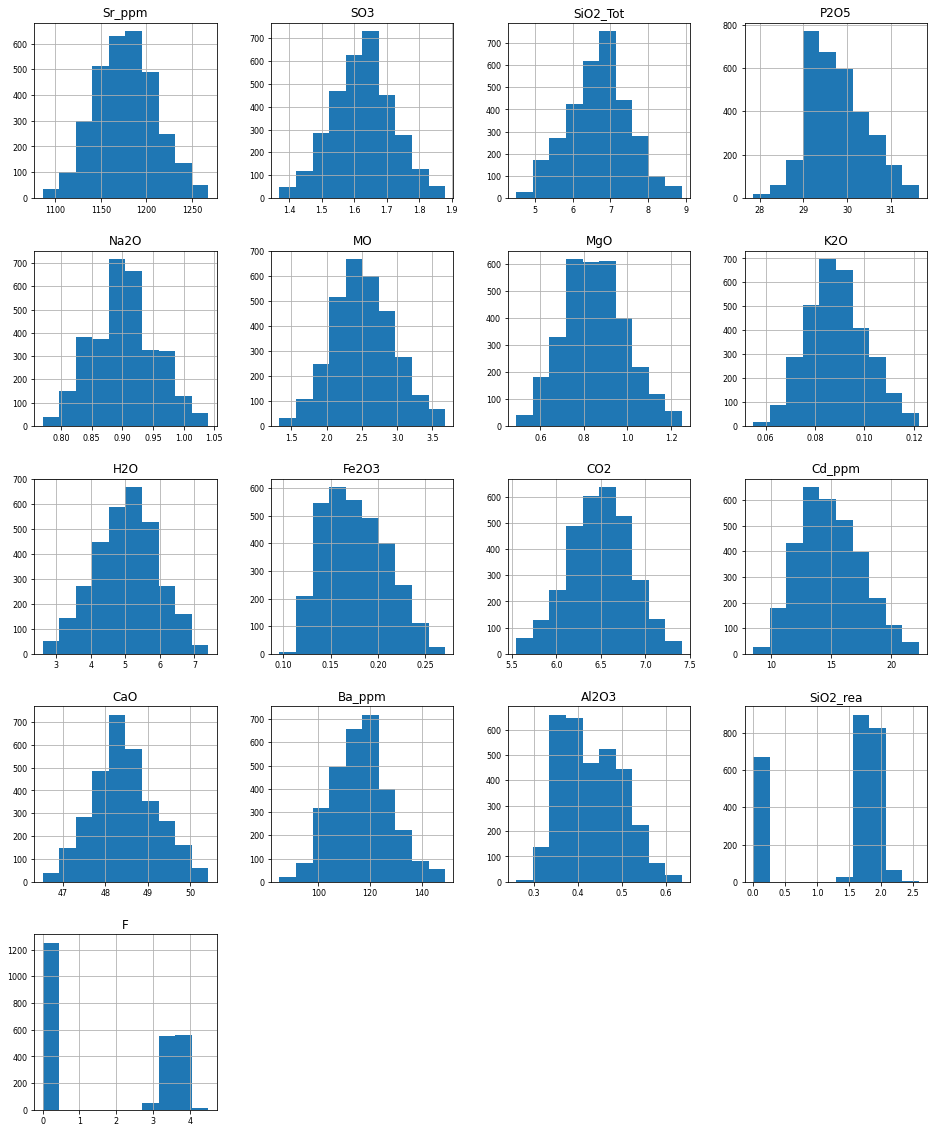

In [ ]:
# Histograme pour visualiser la distribution (Normalité)
df.iloc[:, 1:].hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
# avec KTest (on doit ignorer les valeurs manquantes)
for col in df_num.columns:
  x = ~np.isnan(df[col])
  normed_col = (x-x.mean())/x.std()
  d, p_value = stats.kstest(normed_col, 'norm')
  print(col, ' d={%e} , pval={%e}'%(round(d,3), p_value))

Sr_ppm  d={5.380000e-01} , pval={0.000000e+00}
SO3  d={5.300000e-01} , pval={0.000000e+00}
SiO2_Tot  d={5.380000e-01} , pval={0.000000e+00}
P2O5  d={5.280000e-01} , pval={0.000000e+00}
Na2O  d={5.350000e-01} , pval={0.000000e+00}
MO  d={5.410000e-01} , pval={0.000000e+00}
MgO  d={5.320000e-01} , pval={0.000000e+00}
K2O  d={5.390000e-01} , pval={0.000000e+00}
H2O  d={5.350000e-01} , pval={0.000000e+00}
Fe2O3  d={5.250000e-01} , pval={0.000000e+00}
CO2  d={5.380000e-01} , pval={0.000000e+00}
Cd_ppm  d={5.320000e-01} , pval={0.000000e+00}
CaO  d={5.410000e-01} , pval={0.000000e+00}
Ba_ppm  d={5.410000e-01} , pval={0.000000e+00}
Al2O3  d={5.240000e-01} , pval={0.000000e+00}
SiO2_rea  d={4.790000e-01} , pval={0.000000e+00}
F  d={4.690000e-01} , pval={0.000000e+00}


In [ ]:
# Avec normal Test
for col in df.columns[1:]:
    stat, p = stats.normaltest(df[col], axis=0, nan_policy='omit')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('la distribution de :', col, ' est normale (ne pas rejeter H0)')
    else:
        print('la distribution apparait:', col, ' non gaussienne (rejeter H0)')

Statistics=20.161, p=0.000
la distribution apparait: Sr_ppm  non gaussienne (rejeter H0)
Statistics=6.243, p=0.044
la distribution apparait: SO3  non gaussienne (rejeter H0)
Statistics=10.209, p=0.006
la distribution apparait: SiO2_Tot  non gaussienne (rejeter H0)
Statistics=81.877, p=0.000
la distribution apparait: P2O5  non gaussienne (rejeter H0)
Statistics=20.755, p=0.000
la distribution apparait: Na2O  non gaussienne (rejeter H0)
Statistics=14.983, p=0.001
la distribution apparait: MO  non gaussienne (rejeter H0)
Statistics=45.519, p=0.000
la distribution apparait: MgO  non gaussienne (rejeter H0)
Statistics=38.225, p=0.000
la distribution apparait: K2O  non gaussienne (rejeter H0)
Statistics=19.630, p=0.000
la distribution apparait: H2O  non gaussienne (rejeter H0)
Statistics=225.933, p=0.000
la distribution apparait: Fe2O3  non gaussienne (rejeter H0)
Statistics=10.787, p=0.005
la distribution apparait: CO2  non gaussienne (rejeter H0)
Statistics=75.264, p=0.000
la distribution 

#Corrélation

In [ ]:
#sns.pairplot(df.iloc[:, 1:])

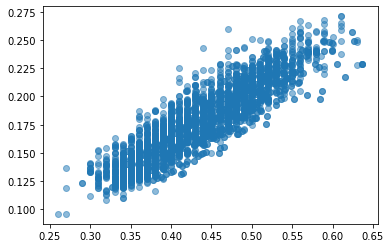

In [ ]:
plt.plot(df['Al2O3'], df['Fe2O3'], 'o', alpha=0.5 )
plt.show()

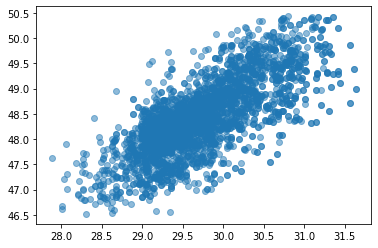

In [ ]:
plt.plot(df['P2O5'], df['CaO'], 'o', alpha=0.5 )
plt.show()

In [ ]:
# Fonction pour calculer et la matrice des p_value et la matrice des corrélations
def calculate_pvalues(df):
    df_test = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df_test.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    rho_pearson =  dfcols.transpose().join(dfcols, how='outer')
    for r in df_test.columns:
        for c in df_test.columns:
            rho_pearson[r][c] = round(pearsonr(df_test[r], df_test[c])[0],3)
            pvalues[r][c] = round(pearsonr(df_test[r], df_test[c])[1], 3)
    return  rho_pearson, pvalues

In [ ]:
# Trouver les resultats pour Notre df
results = calculate_pvalues(df)

# Noter Bien
'''         !!! Pour utiliser pearsonr on doit éliminer les NaN sinon 
la méthode ne marche pas, si on essaie de les ignorer, des colonnes 
n'aurons pas la même longueur et la méthode ne marche pas
            !!! La méthode .corr() les ignores

De ce fait les coefficients de corrélations trouvés par les 2 méthodes
sont différents
'''
# Matrice de Corrélation
rho = results[0]
# Matrice des p_value
pvl = results[1]
print(pvl)

         Sr_ppm    SO3 SiO2_Tot   P2O5  ... Ba_ppm  Al2O3 SiO2_rea      F
Sr_ppm        0      0        0      0  ...  0.143      0        0      0
SO3           0      0    0.047      0  ...      0      0        0      0
SiO2_Tot      0  0.047        0      0  ...      0      0        0   0.15
P2O5          0      0        0      0  ...      0      0        0      0
Na2O          0      0        0      0  ...      0      0        0      0
MO            0      0    0.005      0  ...      0      0        0      0
MgO           0      0        0      0  ...      0      0        0      0
K2O           0      0        0      0  ...  0.024      0    0.001  0.001
H2O       0.004  0.025    0.325  0.019  ...  0.456  0.449    0.004  0.051
Fe2O3         0   0.28        0      0  ...      0      0        0      0
CO2           0      0    0.598      0  ...  0.466      0        0      0
Cd_ppm        0      0    0.003      0  ...      0  0.001        0      0
CaO           0      0        0      0

In [ ]:
# Juste les colonnes dont pvalue<0.05 et corrélation>0.5
var1 = []
var2 = []
corr = []
pval = []

for r in df_num.columns:
  for c in df_num.columns:
    if pvl[r][c]<0.05 and rho.loc[r,c]>0.6 and rho.loc[r,c]!= 1:
       #print(r, '-', c,': coef de corr=',round(rho.loc[r,c],2), ', p_value=',round(pvl[r][c],2))
       var1.append(r)
       var2.append(c)
       corr.append(round(rho.loc[r,c],3))
       pval.append(round(pvl[r][c],3))

In [ ]:
for i in range(len(pval)):
  print('%e'%pval[i])

In [ ]:
# Creér une table avec les corrélations et les p_value
ar = np.array([var1, var2, corr, pval])
corr_pval = pd.DataFrame({'var1': var1, 'var2': var2, 'correlation': corr, 'p_value': pval},
                      index = [i for i in range (0,len(var1))])
corr_pval

,var1,var2,correlation,p_value
0,Sr_ppm,P2O5,0.601,0.0
1,SO3,Na2O,0.623,0.0
2,P2O5,Sr_ppm,0.601,0.0
3,P2O5,CaO,0.751,0.0
4,Na2O,SO3,0.623,0.0
5,Fe2O3,Al2O3,0.901,0.0
6,CaO,P2O5,0.751,0.0
7,Al2O3,Fe2O3,0.901,0.0


In [ ]:
# Intervalle de Confiance
n = len(df.dropna()) 
se = 1/np.sqrt(n-3)
alpha = 0.05

corr_pval['r_z'] = np.arctanh(corr_pval['correlation'])
z = stats.norm.ppf(1-alpha/2)
# Intervalle de confiance de Z
corr_pval['inf_z'] = corr_pval['r_z'] - z*se
corr_pval['sup_z'] = corr_pval['r_z'] + z*se
# Intervalle de confiance du r (coeff de corrélation)
corr_pval['b_inf'] = np.tanh(corr_pval['inf_z'])
corr_pval['b_sup'] = np.tanh(corr_pval['sup_z'])


In [ ]:
corr_pval.drop(['r_z', 'inf_z','sup_z'], axis=1)

,var1,var2,correlation,p_value,b_inf,b_sup
0,Sr_ppm,P2O5,0.601,0.0,0.571216,0.629203
1,SO3,Na2O,0.623,0.0,0.594443,0.649988
2,P2O5,Sr_ppm,0.601,0.0,0.571216,0.629203
3,P2O5,CaO,0.751,0.0,0.730529,0.770123
4,Na2O,SO3,0.623,0.0,0.594443,0.649988
5,Fe2O3,Al2O3,0.901,0.0,0.892101,0.909200
6,CaO,P2O5,0.751,0.0,0.730529,0.770123
7,Al2O3,Fe2O3,0.901,0.0,0.892101,0.909200


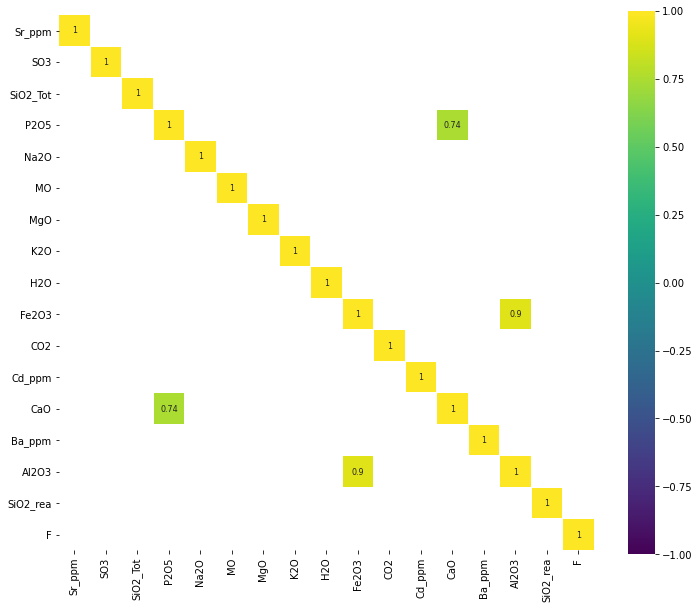

In [ ]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Saisonalité

In [ ]:
import datetime as date

indices_2017 = [i for i in range(len(df)) if df['Date'][i].year == 2017]
indices_2018 = [i for i in range(len(df)) if df['Date'][i].year == 2018]
indices_2019 = [i for i in range(len(df)) if df['Date'][i].year == 2019]
indices_2020 = [i for i in range(len(df)) if df['Date'][i].year == 2020]

donnees_2017 = df.iloc[indices_2017]
donnees_2018 = df.iloc[indices_2018]
donnees_2019 = df.iloc[indices_2019]
donnees_2020 = df.iloc[indices_2020]

In [ ]:
indexed_df = df.set_index('Date')
resampled_df = indexed_df.resample('M').mean()

(array([736330., 736511., 736695., 736876., 737060., 737241., 737425.,
        737607., 737791.]), <a list of 9 Text major ticklabel objects>)

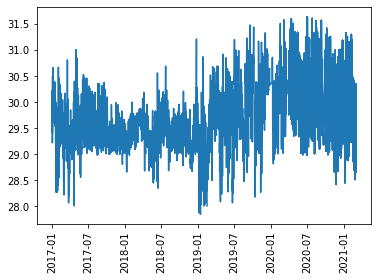

In [ ]:
plt.plot(df['Date'],df['P2O5'], markersize = 12)
plt.xticks(rotation='vertical')

(array([736330., 736511., 736695., 736876., 737060., 737241., 737425.,
        737607., 737791.]), <a list of 9 Text major ticklabel objects>)

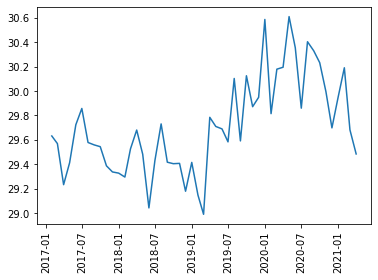

In [ ]:
plt.plot(resampled_df['P2O5'], markersize = 12)
plt.xticks(rotation='vertical')

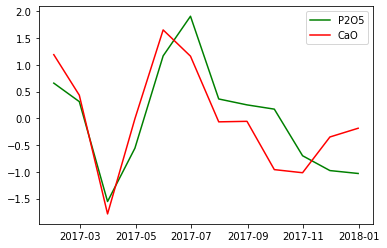

In [ ]:
indexed_17 = donnees_2017.set_index('Date')
resampled_17 = indexed_17.resample('M').mean()

std_p2o5 = (resampled_17['P2O5'] - resampled_17['P2O5'].mean())/resampled_17['P2O5'].std()
std_cao = (resampled_17['CaO'] - resampled_17['CaO'].mean())/resampled_17['CaO'].std()

plt.plot(std_p2o5, markersize = 12, color='g')
plt.plot(std_cao, markersize = 12, color='r')
plt.legend(('P2O5','CaO'))

In [ ]:
def saisonnalite_cols(df, col1, col2):
  indexed_df = df.set_index('Date')
  resampled_df = indexed_df.resample('M').mean()

  std_col1 = (resampled_df[col1] - resampled_df[col1].mean())/resampled_df[col1].std()
  std_col2 = (resampled_df[col2] - resampled_df[col2].mean())/resampled_df[col2].std()

  plt.plot(std_col1, markersize = 12, color='g')
  plt.plot(std_col2, markersize = 12, color='r')
  plt.legend((col1,col2))

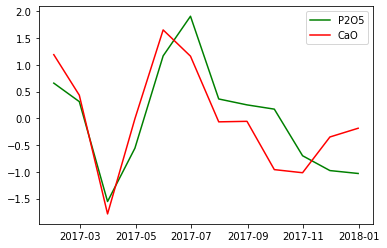

In [ ]:
saisonnalite_cols(donnees_2017, 'P2O5', 'CaO')

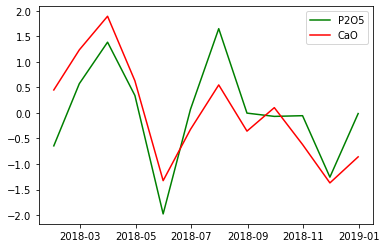

In [ ]:
saisonnalite_cols(donnees_2018, 'P2O5', 'CaO')

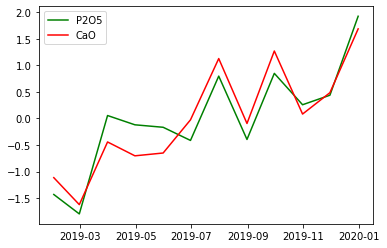

In [ ]:
saisonnalite_cols(donnees_2019, 'P2O5', 'CaO')

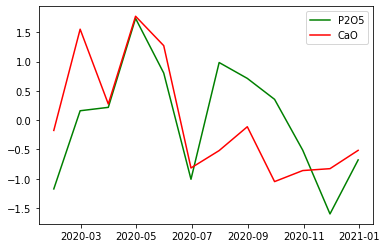

In [ ]:
saisonnalite_cols(donnees_2020, 'P2O5', 'CaO')

In [ ]:
def saisonnalite_many_cols(df, *argv):
  indexed_df = df.set_index('Date')
  resampled_df = indexed_df.resample('M').mean()

  for col in argv:
    std_col = (resampled_df[col] - resampled_df[col].mean())/resampled_df[col].std()
    plt.plot(std_col, markersize = 12)
  
  plt.legend(argv)

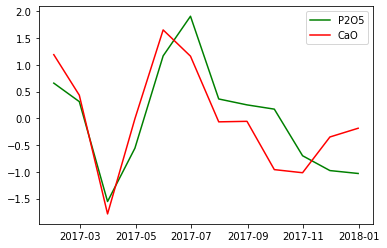

In [ ]:
saisonnalite_cols(donnees_2017, 'P2O5', 'CaO')

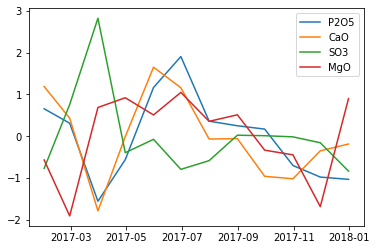

In [ ]:
saisonnalite_many_cols(donnees_2017, 'P2O5', 'CaO', 'SO3', 'MgO')